# PREDICTING THE PRICE OF PRE-OWNED CARS

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

## Setting dimensions for plot

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Reading CSV file

In [ ]:
cars_data = pd.read_csv('cars_sampled.csv')

## creating copy

In [ ]:
cars_data1 = cars_data.copy()

## structure of data

In [ ]:
cars_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18703 entries, 0 to 18702
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dateCrawled          18703 non-null  object 
 1   name                 18703 non-null  object 
 2   seller               18703 non-null  object 
 3   offerType            18703 non-null  object 
 4   price                18703 non-null  int64  
 5   abtest               18703 non-null  object 
 6   vehicleType          16758 non-null  object 
 7   yearOfRegistration   18703 non-null  int64  
 8   gearbox              17649 non-null  object 
 9   powerPS              18703 non-null  int64  
 10  model                17681 non-null  object 
 11  kilometer            18703 non-null  int64  
 12  monthOfRegistration  18703 non-null  int64  
 13  fuelType             17003 non-null  object 
 14  brand                18703 non-null  object 
 15  notRepairedDamage    15002 non-null 

## statistical summary of data

In [ ]:
cars_data1.describe()
pd.set_option('display.float_format',lambda x: '%.3f' % x)
cars_data1.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,18703.000,18703.000,18703.000,18703.000,18703.000,18702.000
mean,7087.585,2005.001,117.294,125183.393,5.717,50640.155
std,106106.979,118.382,250.194,40538.181,3.691,25651.733
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,70.000,100000.000,3.000,30519.000
50%,2990.000,2003.000,105.000,150000.000,6.000,49403.500
75%,7200.000,2008.000,150.000,150000.000,9.000,71116.000
max,10010011.000,9999.000,16312.000,150000.000,12.000,99998.000


In [ ]:
pd.set_option('display.max_columns',500)
cars_data1.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,18703.000,18703.000,18703.000,18703.000,18703.000,18702.000
mean,7087.585,2005.001,117.294,125183.393,5.717,50640.155
std,106106.979,118.382,250.194,40538.181,3.691,25651.733
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,70.000,100000.000,3.000,30519.000
50%,2990.000,2003.000,105.000,150000.000,6.000,49403.500
75%,7200.000,2008.000,150.000,150000.000,9.000,71116.000
max,10010011.000,9999.000,16312.000,150000.000,12.000,99998.000


## Dropping unwanted columns

In [ ]:
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars_data1 = cars_data1.drop(columns=col, axis=1)

## Removing duplicate records

In [ ]:
cars_data1.drop_duplicates(keep='first',inplace=True)

# Data cleaning

In [ ]:
## no. of missing values in each column
cars_data1.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            1938
yearOfRegistration        0
gearbox                1042
powerPS                   0
model                  1016
kilometer                 0
monthOfRegistration       0
fuelType               1692
brand                     0
notRepairedDamage      3685
dtype: int64

In [ ]:
# Variable : yearOfRegistration
yearwise_count = cars_data1['yearOfRegistration'].value_counts().sort_index()

In [ ]:
print(yearwise_count)

1000      3
1910      7
1928      1
1929      1
1933      1
       ... 
2017    497
2018    210
2019      1
3500      1
9999      4
Name: yearOfRegistration, Length: 80, dtype: int64


In [ ]:
sum(cars_data1['yearOfRegistration']>2018)

6

In [ ]:
sum(cars_data1['yearOfRegistration']<1950)

18

In [ ]:
# working_range : 1950-2018

In [ ]:
# variable price
price_count = cars_data1['price'].value_counts().sort_index()
print(price_count)

0           564
1            66
3             1
8             1
10            2
           ... 
487000        1
999999        1
2795000       1
9999999       1
10010011      1
Name: price, Length: 1549, dtype: int64


In [ ]:
sum(cars_data1['price']<100)

692

In [ ]:
sum(cars_data1['price']>150000)

13

In [ ]:
# working range : 100-150000

In [ ]:
# variable : powerPS
powerPS_count = cars_data1['powerPS'].value_counts().sort_index()
print(powerPS_count)

0        2058
1           2
2           1
3           2
4           2
         ... 
12512       1
12684       1
15017       1
16011       1
16312       1
Name: powerPS, Length: 354, dtype: int64


In [ ]:
sum(cars_data['powerPS']<10)

2092

In [ ]:
sum(cars_data['powerPS']>500)

48

In [ ]:
# working range - 10 and 500

In [ ]:
cars_data1 = cars_data1[
(cars_data1.yearOfRegistration<=2018)
&(cars_data1.yearOfRegistration>=1950)
&(cars_data1.price>=100)
&(cars_data1.price<=150000)
&(cars_data1.powerPS>=10)
&(cars_data1.powerPS<=500)
]

In [ ]:
cars_data1['price'].value_counts().sort_index()

100       21
110        1
111        1
120        5
125        1
          ..
120911     1
125000     1
130000     1
134900     1
139000     1
Name: price, Length: 1473, dtype: int64

In [ ]:
## calculating age from year of registration and month of registration
cars_data1['monthOfRegistration']/=12

<ipython-input-26-4a7bf0ad8d83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data1['monthOfRegistration']/=12


In [ ]:
cars_data1['age'] = (2018-cars_data1['yearOfRegistration']) + cars_data1['monthOfRegistration']

<ipython-input-27-7c3ed0336158>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data1['age'] = (2018-cars_data1['yearOfRegistration']) + cars_data1['monthOfRegistration']


In [ ]:
cars_data1['age'] = round(cars_data1['age'],2)

<ipython-input-28-e9c8c6d7cabc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data1['age'] = round(cars_data1['age'],2)


In [ ]:
print(cars_data1['age'])

0       15.250
1       13.500
2       15.920
3       13.000
4       10.920
         ...  
18698   12.580
18699    2.830
18700   14.920
18701    1.250
18702   16.170
Name: age, Length: 16080, dtype: float64


In [ ]:
cars_data1['age'].describe()

count   16080.000
mean       14.810
std         7.107
min         0.000
25%        10.170
50%        14.830
75%        19.250
max        64.500
Name: age, dtype: float64

In [ ]:
cars_data1 = cars_data1.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)

## Visualising parameters

In [ ]:
## age

<Axes: xlabel='age', ylabel='Count'>

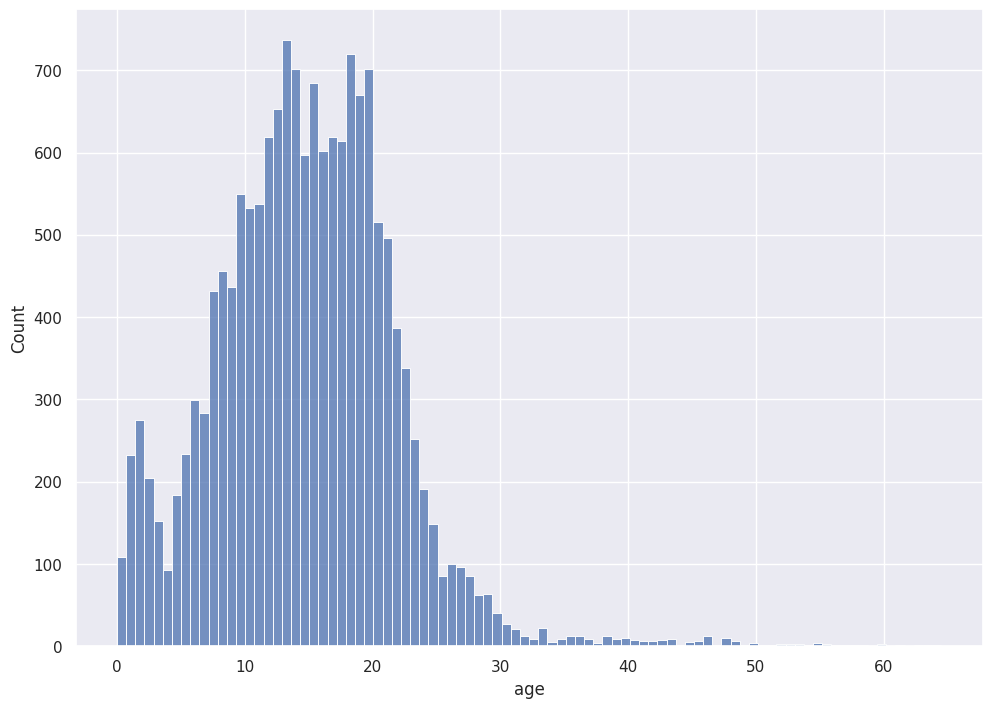

In [ ]:
sns.histplot(cars_data1['age'])

<Axes: ylabel='age'>

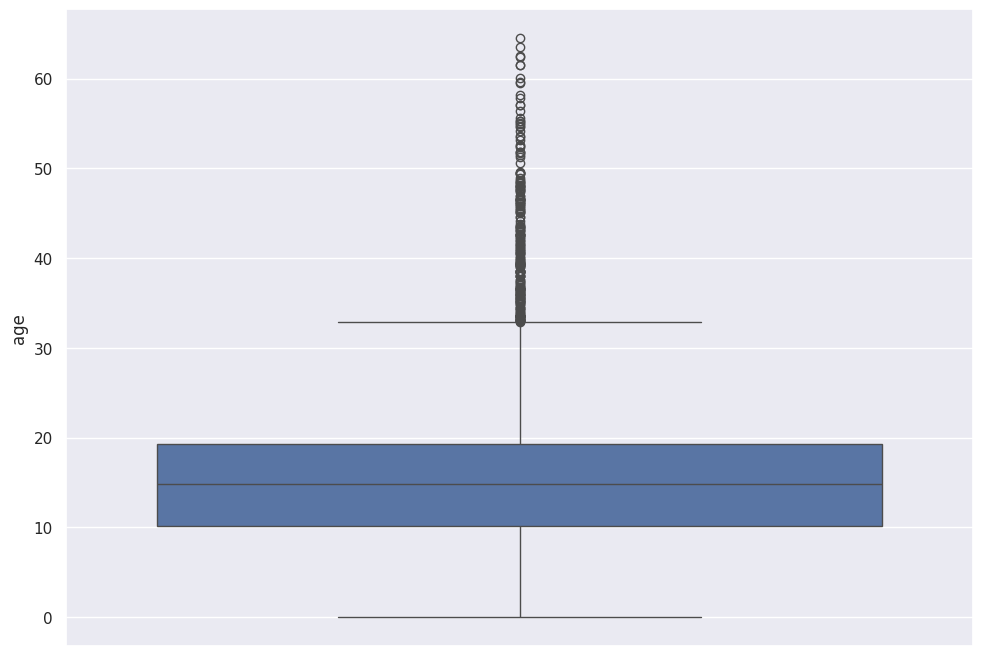

In [ ]:
sns.boxplot(cars_data1['age'])

In [ ]:
## price

<Axes: xlabel='price', ylabel='Count'>

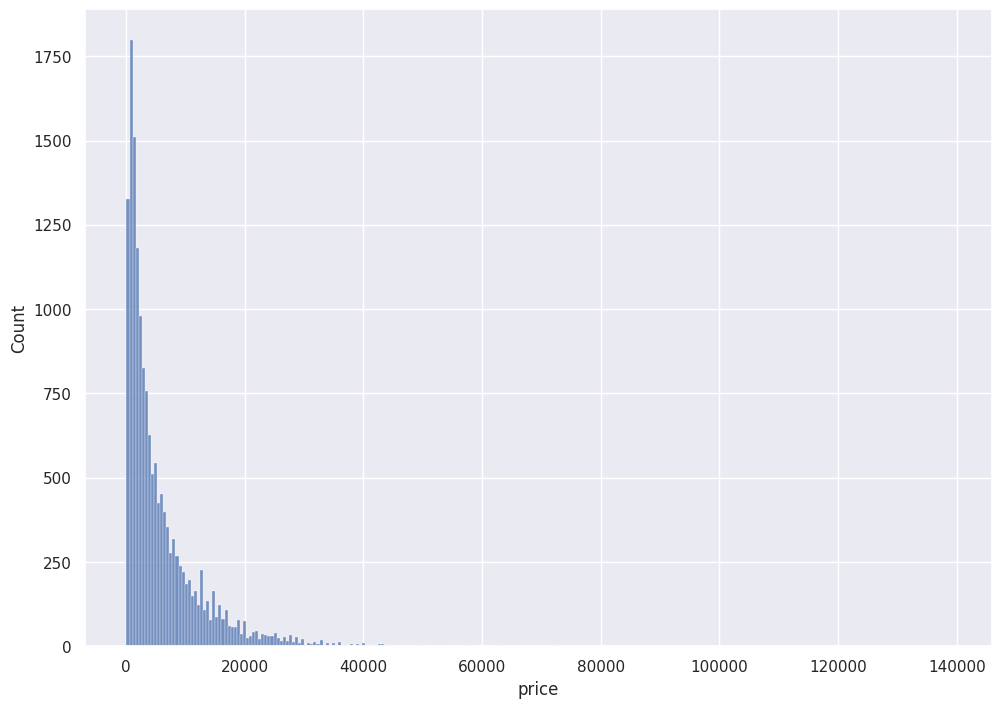

In [ ]:
sns.histplot(cars_data1['price'])

<Axes: ylabel='price'>

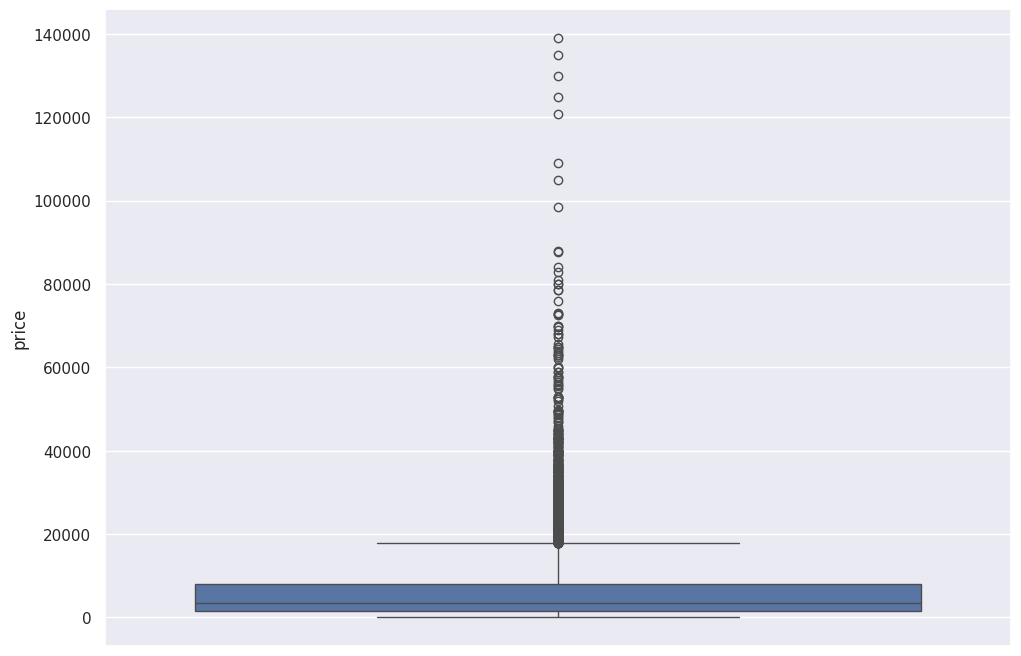

In [ ]:
sns.boxplot(cars_data1['price'])

In [ ]:
cars_data1['price']

0         4450
1        13299
2         3200
3         4500
4        18750
         ...  
18698     6950
18699      100
18700     4600
18701    11900
18702     4500
Name: price, Length: 16080, dtype: int64

<Axes: xlabel='age', ylabel='price'>

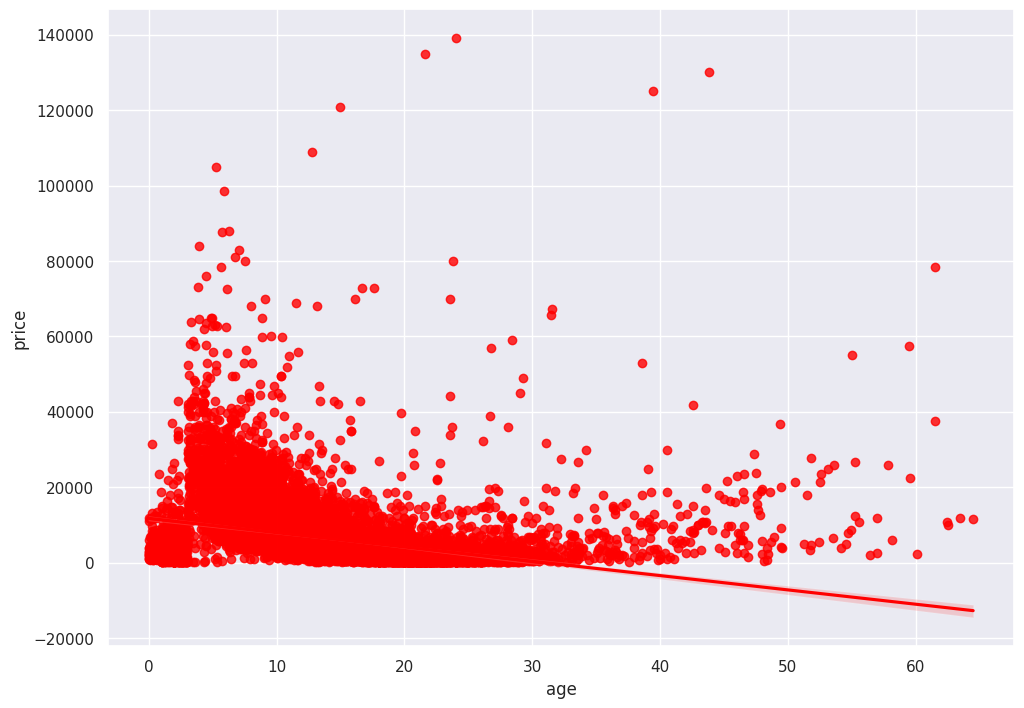

In [ ]:
sns.regplot(x='age', y='price', data=cars_data1, fit_reg=True, color='red')

In [ ]:
# With increase in age, price decreases

<Axes: xlabel='powerPS', ylabel='price'>

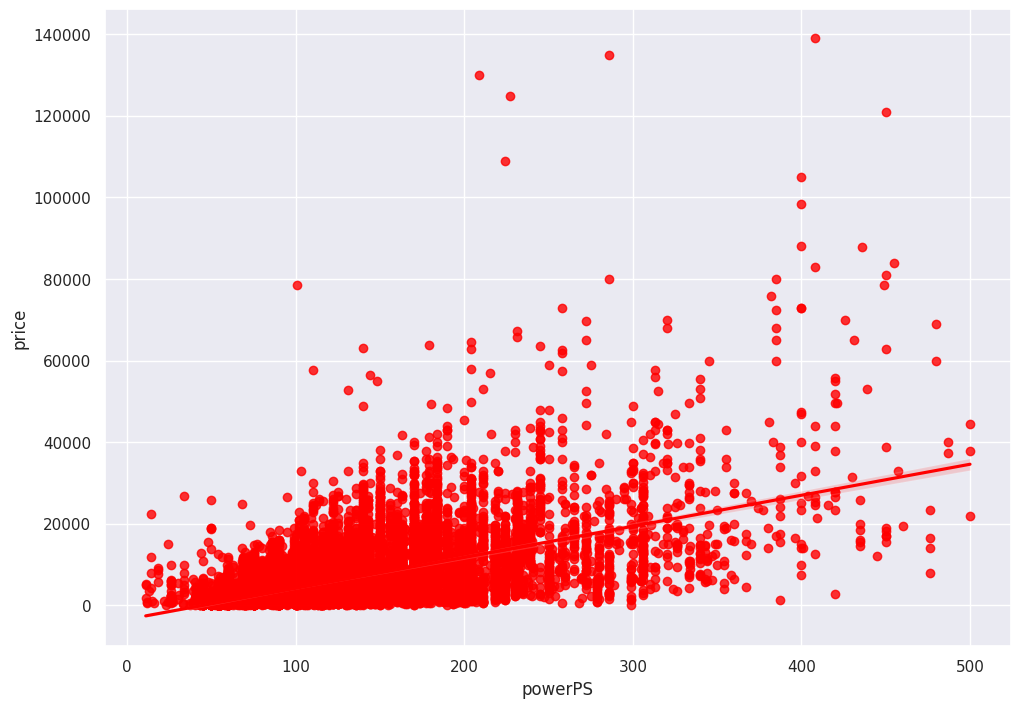

In [ ]:
# powerPS vs price
sns.regplot(x='powerPS', y='price', data=cars_data1, fit_reg=True, color='red')

In [ ]:
# with increase in powerPS, price increases

In [ ]:
cars_data1.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'age'],
      dtype='object')

In [ ]:
cars_data1['seller'].value_counts()

private    16080
Name: seller, dtype: int64

<Axes: xlabel='seller', ylabel='count'>

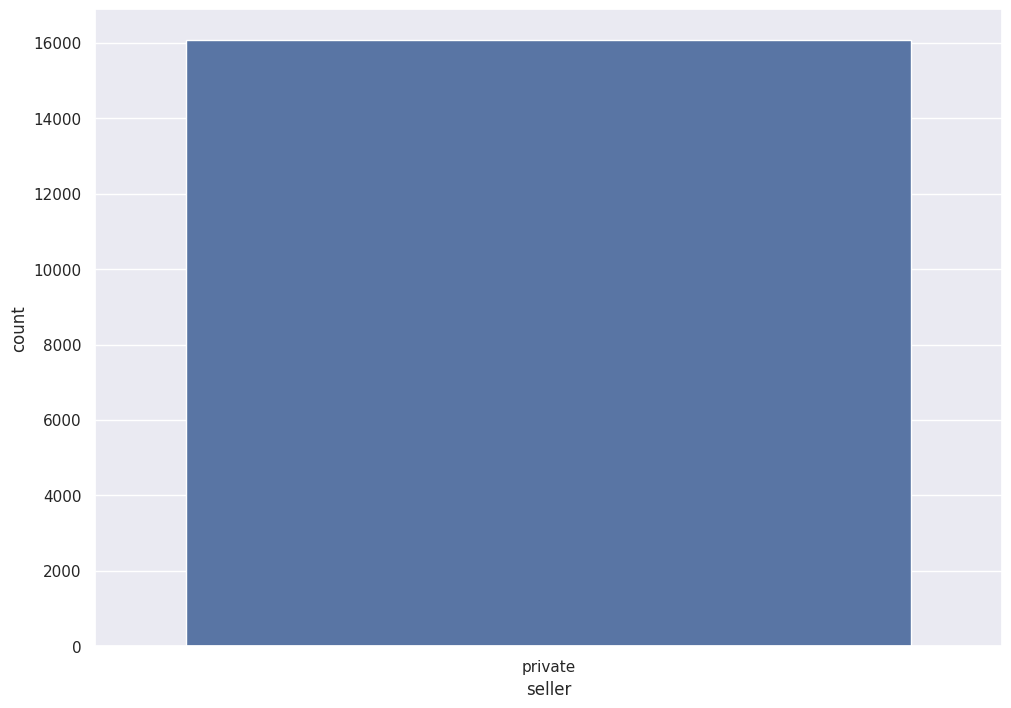

In [ ]:
sns.countplot(x=cars_data1['seller'])

In [ ]:
# since very few cars have 'commercial' => insignificant

In [ ]:
#variable offerType
cars_data1['offerType'].value_counts()

offer    16080
Name: offerType, dtype: int64

<Axes: xlabel='offerType', ylabel='count'>

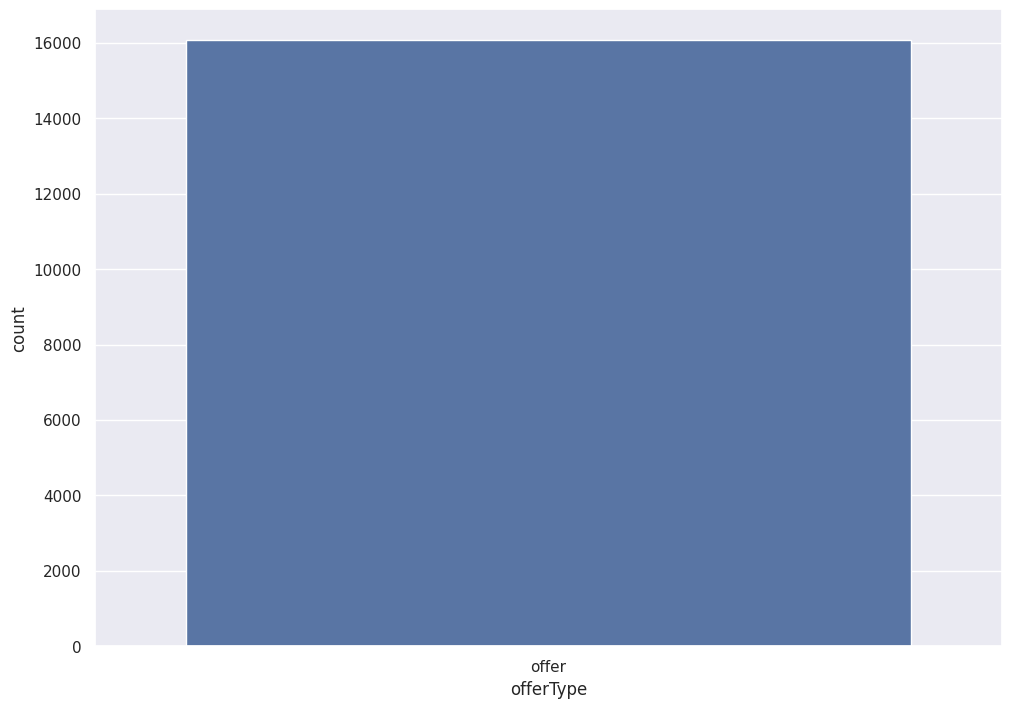

In [ ]:
sns.countplot(x=cars_data1['offerType'])

In [ ]:
# all cars have 'offer' => insignificant

In [ ]:
#variable : abtest
cars_data1['abtest'].value_counts()

test       8319
control    7761
Name: abtest, dtype: int64

In [ ]:
pd.crosstab(cars_data1['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<Axes: xlabel='abtest', ylabel='count'>

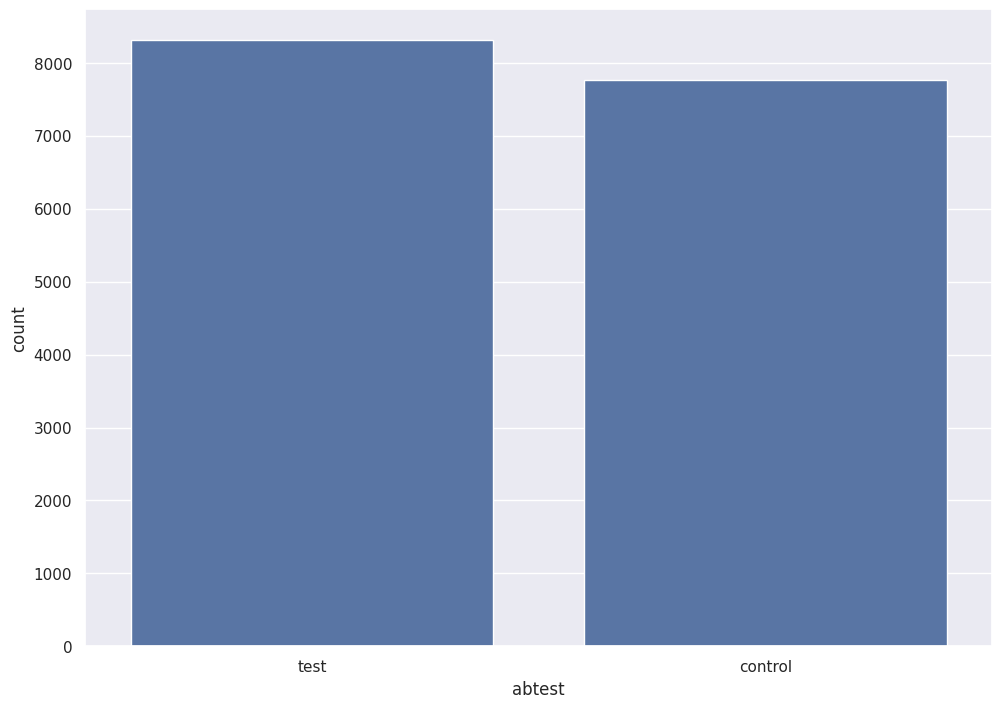

In [ ]:
sns.countplot(x=cars_data1['abtest'])

In [ ]:
# equally distributed

<Axes: xlabel='abtest', ylabel='price'>

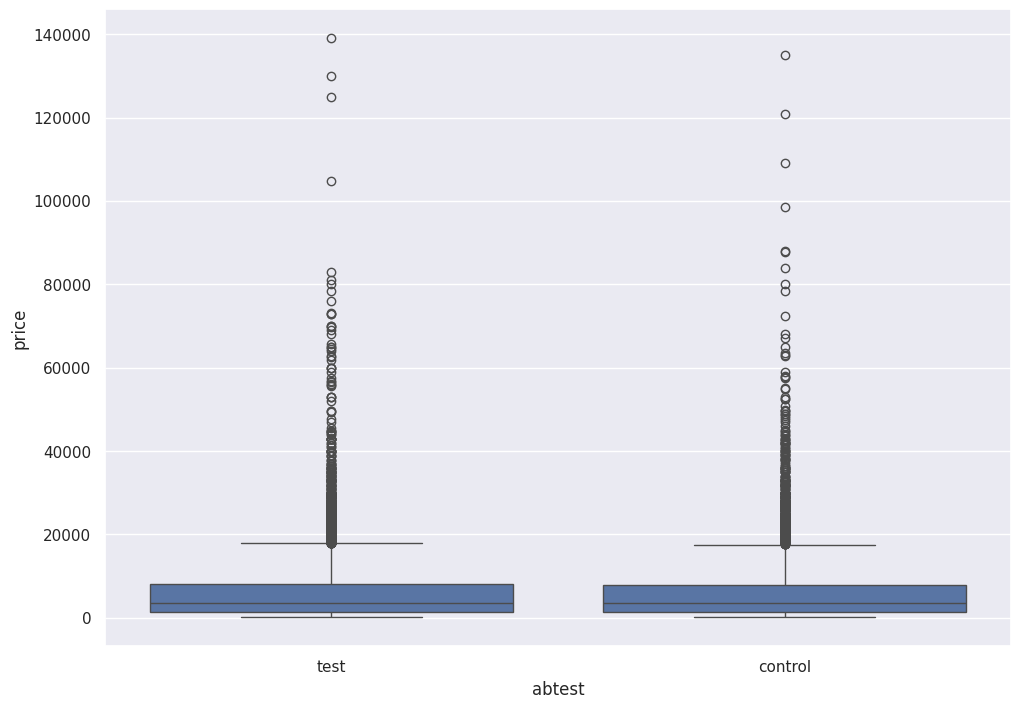

In [ ]:
sns.boxplot(x='abtest',y='price',data=cars_data1)

In [ ]:
# for every price value there is almost 50-50 distribution
# so, doesn't effect the price => insignificant

In [ ]:
# variable: vehicleType
cars_data1['vehicleType'].value_counts()

limousine        4487
small car        3513
station wagon    2997
bus              1297
cabrio           1065
coupe             853
suv               665
others            120
Name: vehicleType, dtype: int64

In [ ]:
pd.crosstab(cars_data1['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.086
cabrio,0.071
coupe,0.057
limousine,0.299
others,0.008
small car,0.234
station wagon,0.200
suv,0.044


<Axes: xlabel='vehicleType', ylabel='count'>

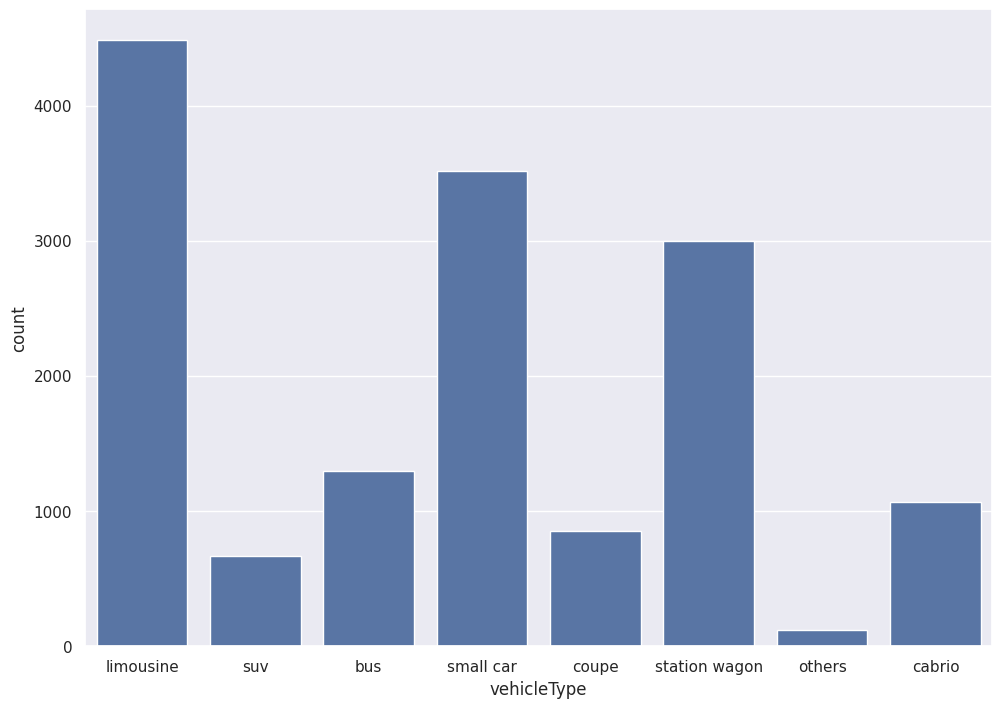

In [ ]:
sns.countplot(x=cars_data1['vehicleType'])

<Axes: xlabel='vehicleType', ylabel='price'>

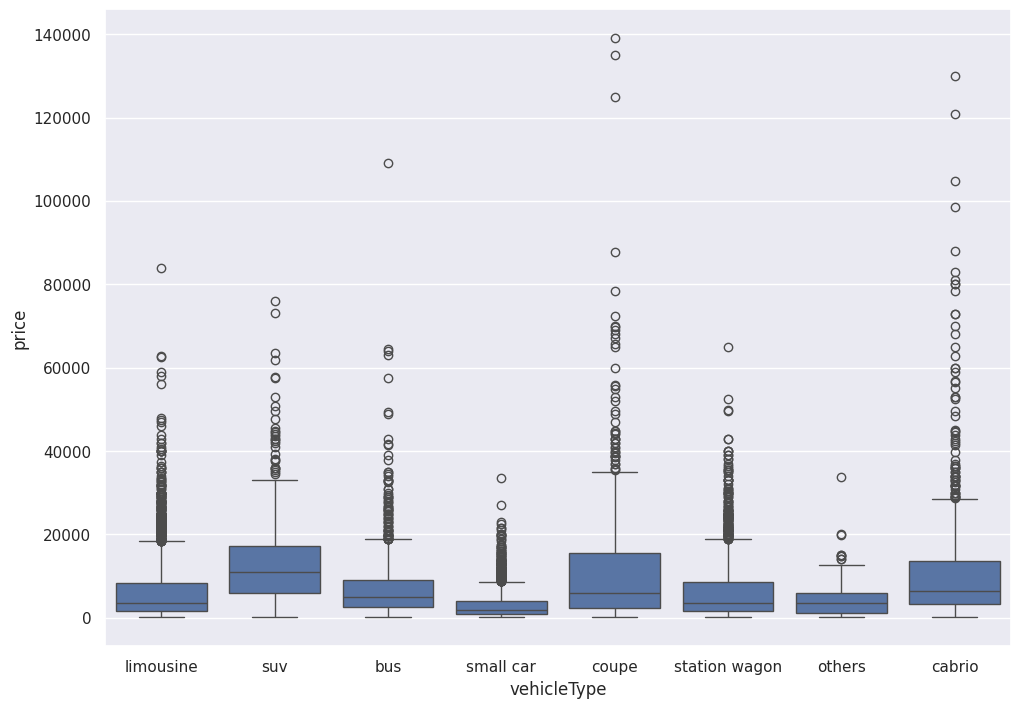

In [ ]:
sns.boxplot(x='vehicleType',y='price',data=cars_data1)

In [ ]:
# vehicleType attribute affects price

In [ ]:
# variable : gearbox
cars_data1['gearbox'].value_counts()

manual       12266
automatic     3521
Name: gearbox, dtype: int64

In [ ]:
pd.crosstab(cars_data1['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.223
manual,0.777


<Axes: xlabel='gearbox', ylabel='count'>

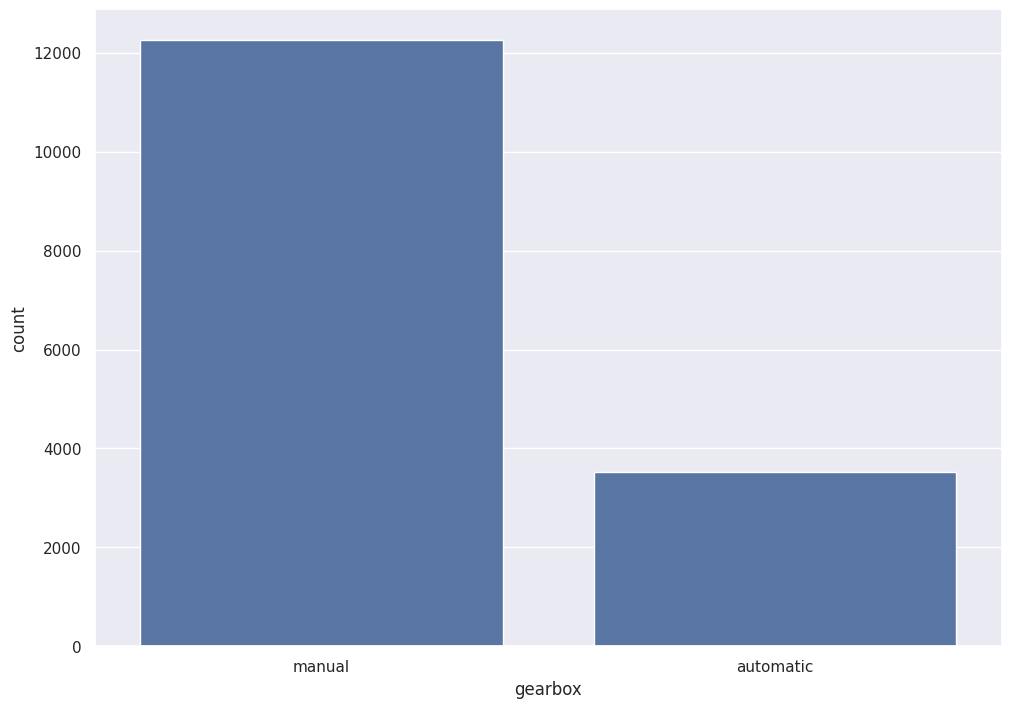

In [ ]:
sns.countplot(x=cars_data1['gearbox'])

<Axes: xlabel='gearbox', ylabel='price'>

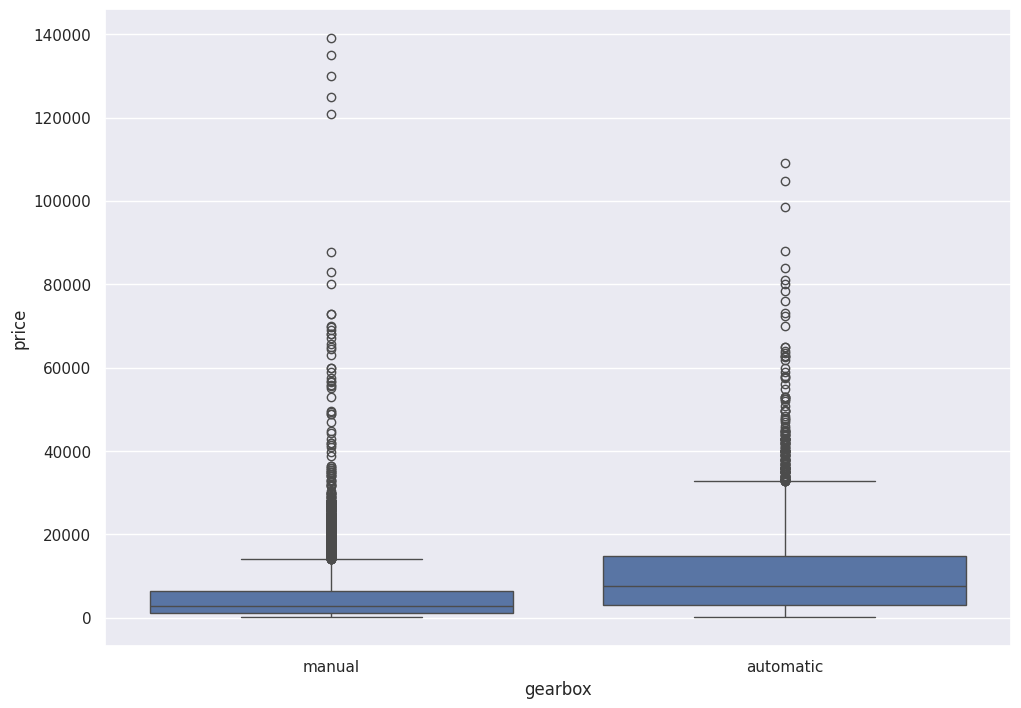

In [ ]:
sns.boxplot(x='gearbox',y='price',data=cars_data1)

In [ ]:
# gearbox affects price

In [ ]:
# variable : model
cars_data1['model'].value_counts()

golf      1341
others    1080
3er        888
polo       582
astra      520
          ... 
145          1
terios       1
nubira       1
musa         1
croma        1
Name: model, Length: 239, dtype: int64

In [ ]:
pd.crosstab(cars_data1['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.002
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<Axes: xlabel='count', ylabel='model'>

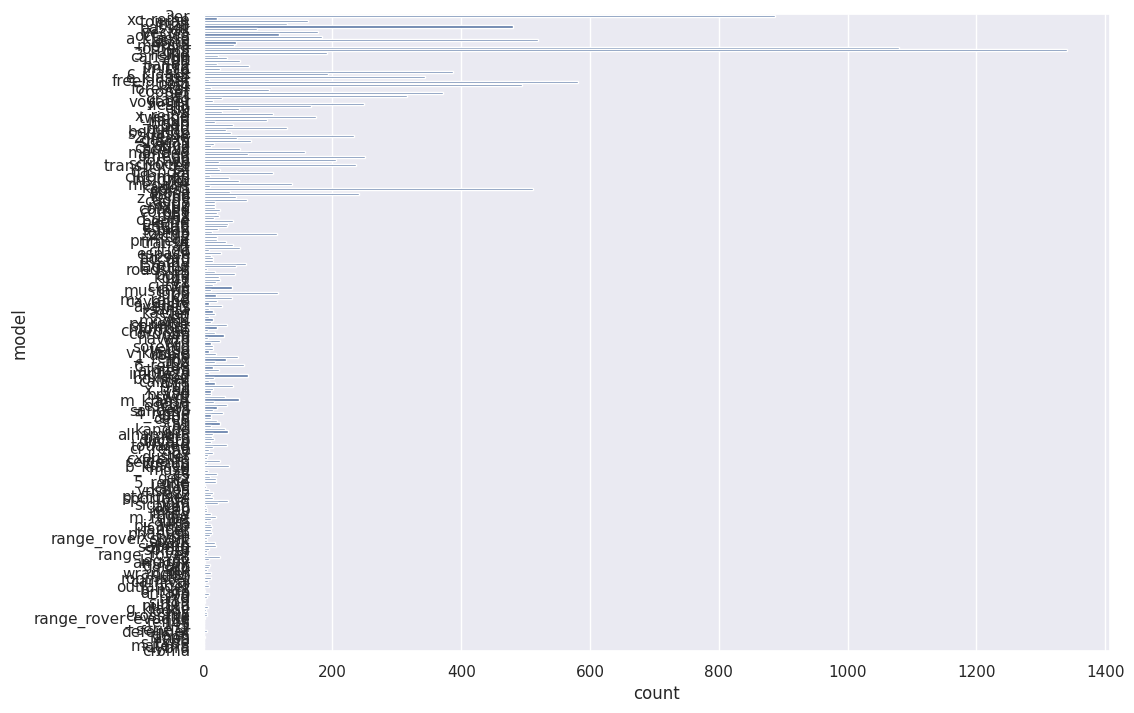

In [ ]:
sns.countplot(cars_data1['model'])

In [ ]:
# variable : kilometer
cars_data1['kilometer'].value_counts()

150000    10265
125000     1695
100000      695
90000       556
80000       509
60000       441
70000       439
50000       364
40000       326
30000       273
20000       267
5000        173
10000        77
Name: kilometer, dtype: int64

In [ ]:
pd.crosstab(cars_data1['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.017
30000,0.017
40000,0.020
50000,0.023
60000,0.027
70000,0.027
80000,0.032


<Axes: xlabel='kilometer', ylabel='price'>

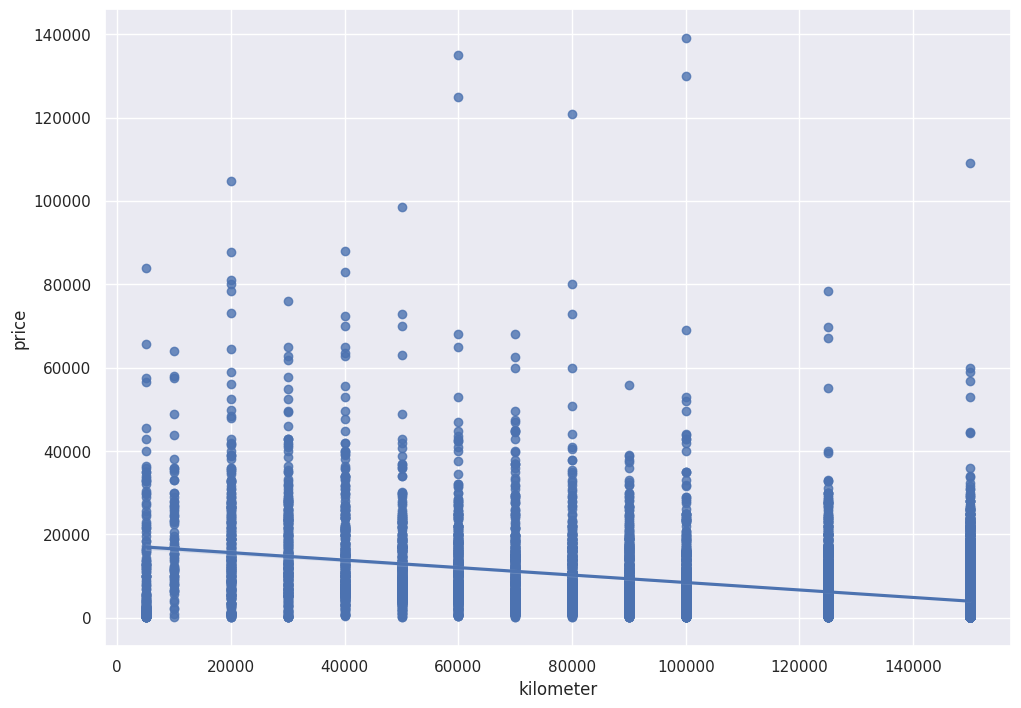

In [ ]:
sns.regplot(x='kilometer',y='price',data=cars_data1,fit_reg=True,scatter=True)

In [ ]:
# As kilometer increases, price decreases

<Axes: xlabel='kilometer', ylabel='Count'>

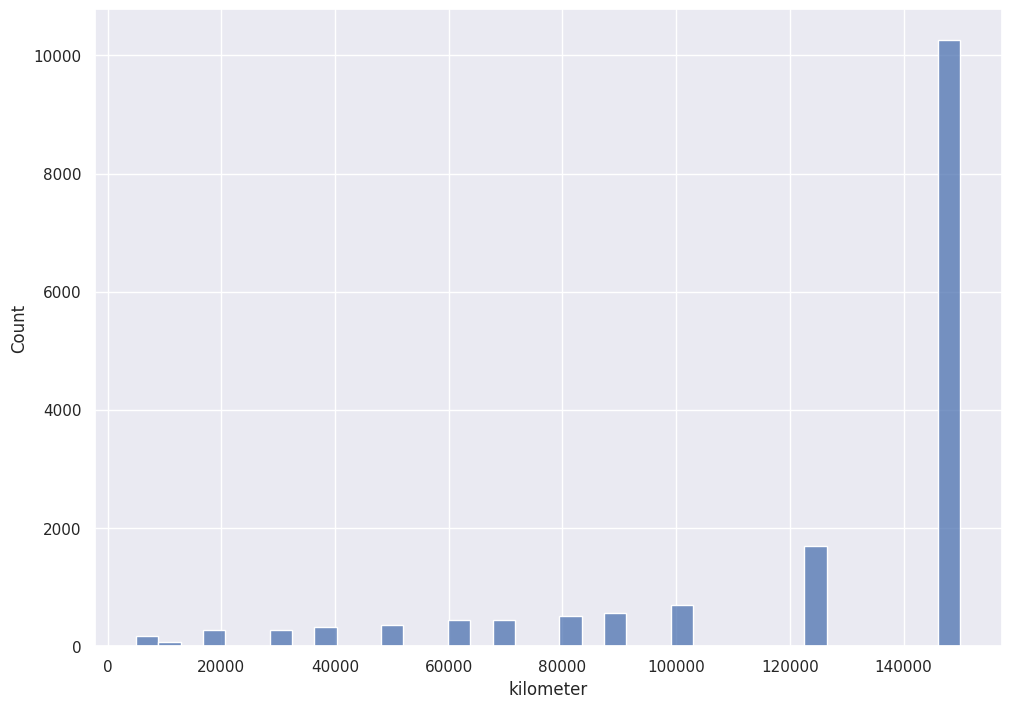

In [ ]:
sns.histplot(cars_data1['kilometer'])

In [ ]:
# variable : fuelType
cars_data1['fuelType'].value_counts()

petrol     9983
diesel     4797
lpg         246
cng          24
hybrid       14
electro       5
other         2
Name: fuelType, dtype: int64

In [ ]:
pd.crosstab(cars_data1['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.318
electro,0.000
hybrid,0.001
lpg,0.016
other,0.000
petrol,0.662


<Axes: xlabel='fuelType', ylabel='count'>

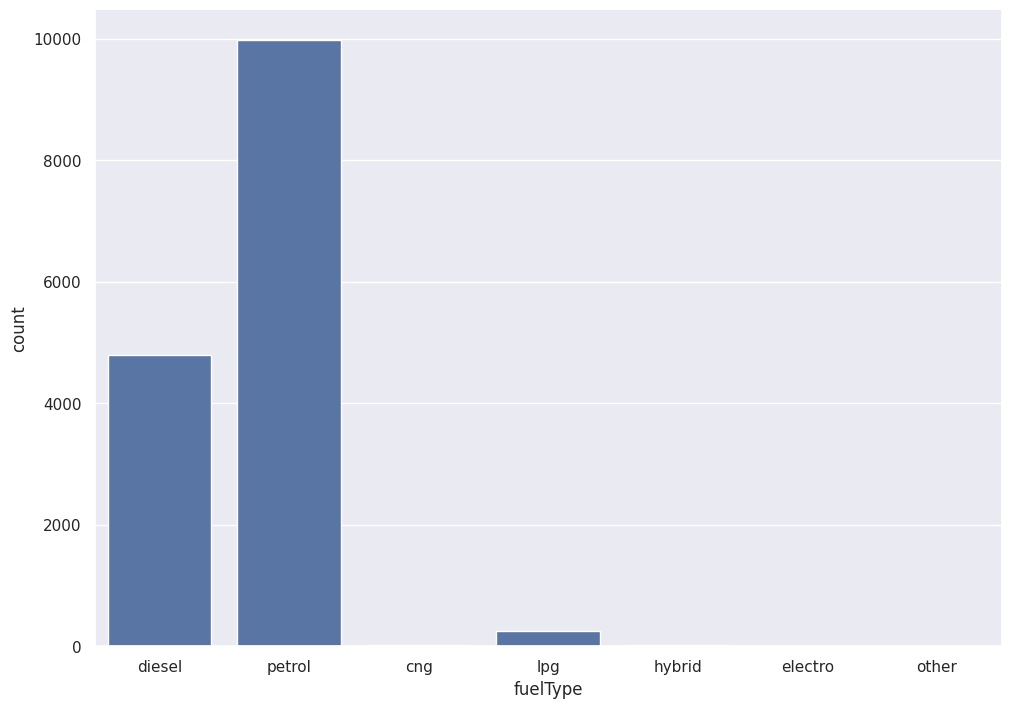

In [ ]:
sns.countplot(x=cars_data1['fuelType'])

<Axes: xlabel='fuelType', ylabel='price'>

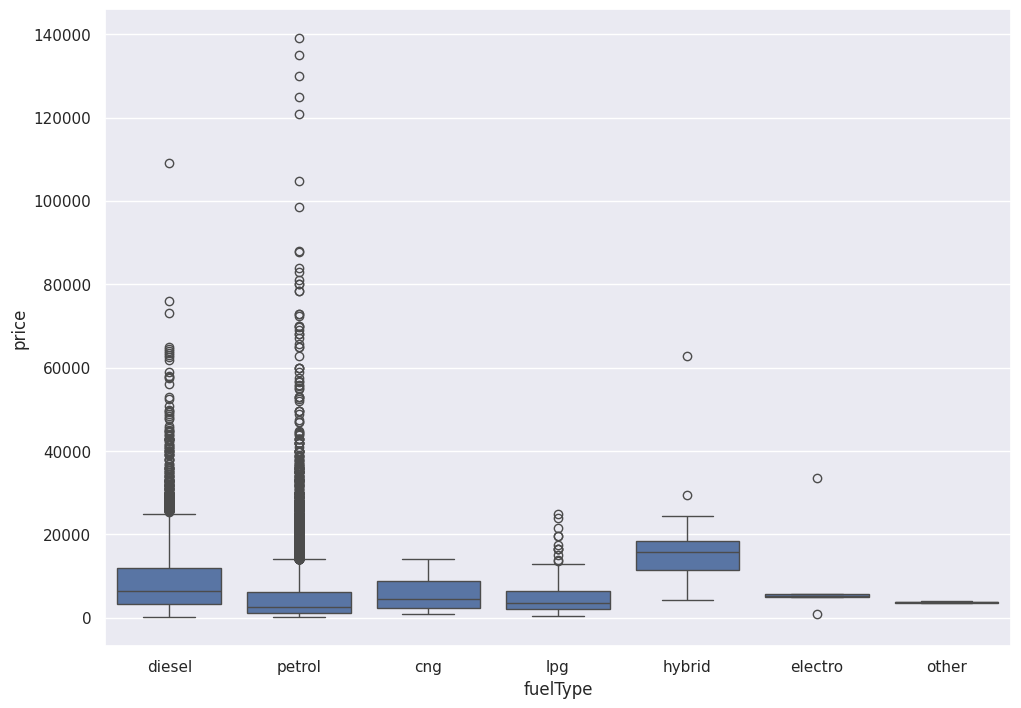

In [ ]:
sns.boxplot(x='fuelType',y='price',data=cars_data1)

In [ ]:
# fuelType affects price

In [ ]:
cars_data1['brand'].value_counts()

volkswagen        3520
bmw               1794
opel              1705
mercedes_benz     1512
audi              1481
ford              1058
renault            723
peugeot            503
fiat               377
seat               327
skoda              275
mazda              264
smart              242
nissan             223
citroen            219
toyota             198
mini               155
volvo              149
hyundai            148
mitsubishi         143
sonstige_autos     117
honda              103
porsche            103
kia                 93
suzuki              93
alfa_romeo          89
chevrolet           82
chrysler            62
subaru              47
dacia               44
jeep                37
saab                31
land_rover          28
jaguar              26
rover               23
trabant             22
daihatsu            22
lancia              16
daewoo              16
lada                10
Name: brand, dtype: int64

<Axes: xlabel='count', ylabel='brand'>

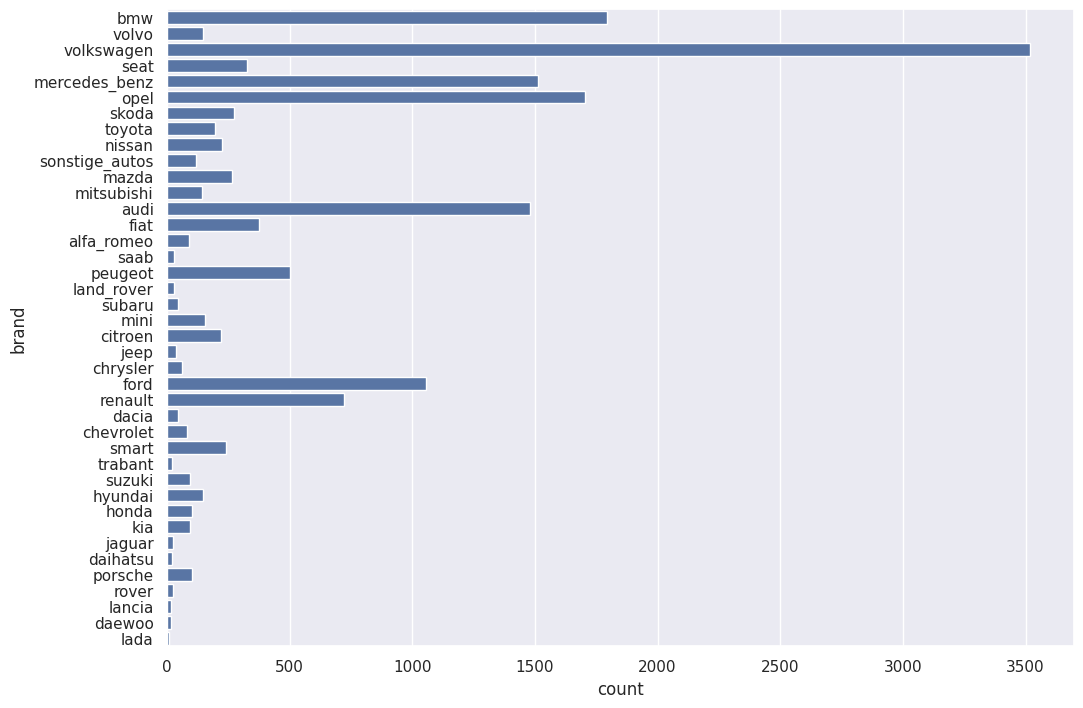

In [ ]:
sns.countplot(cars_data1['brand'])

In [ ]:
# cars are distributed over different brands

<Axes: xlabel='brand', ylabel='price'>

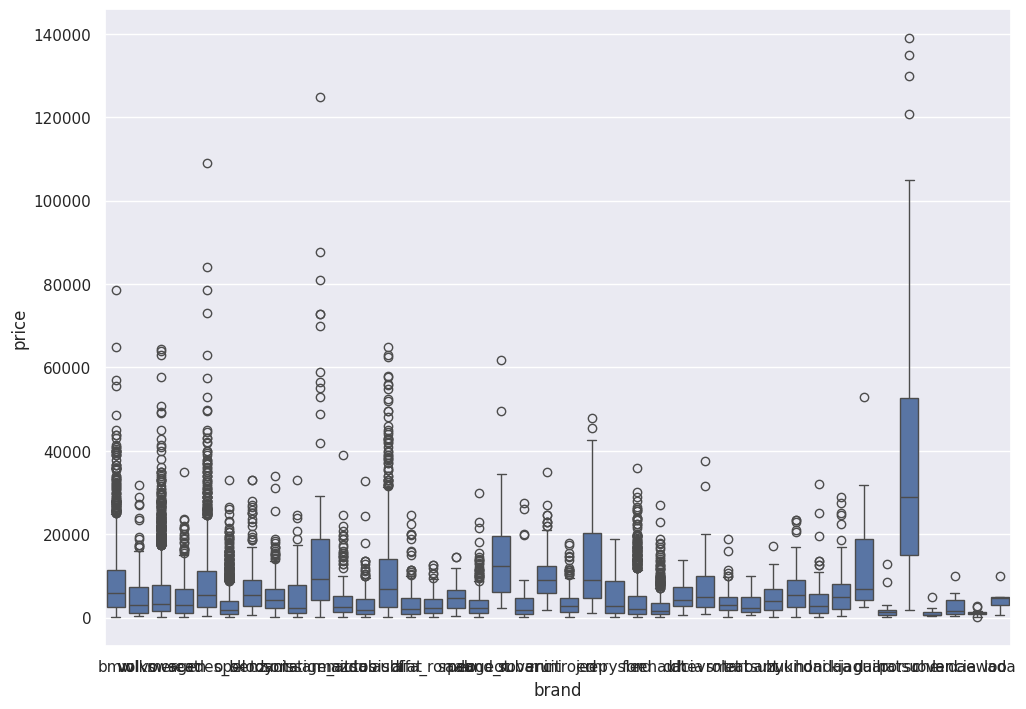

In [ ]:
sns.boxplot(x='brand',y='price',data=cars_data1)

In [ ]:
# different car brands have different price range

In [ ]:
# variable : notRepairedDamage
cars_data1['notRepairedDamage'].value_counts()

no     12179
yes     1483
Name: notRepairedDamage, dtype: int64

In [ ]:
pd.crosstab(cars_data1['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<Axes: xlabel='notRepairedDamage', ylabel='count'>

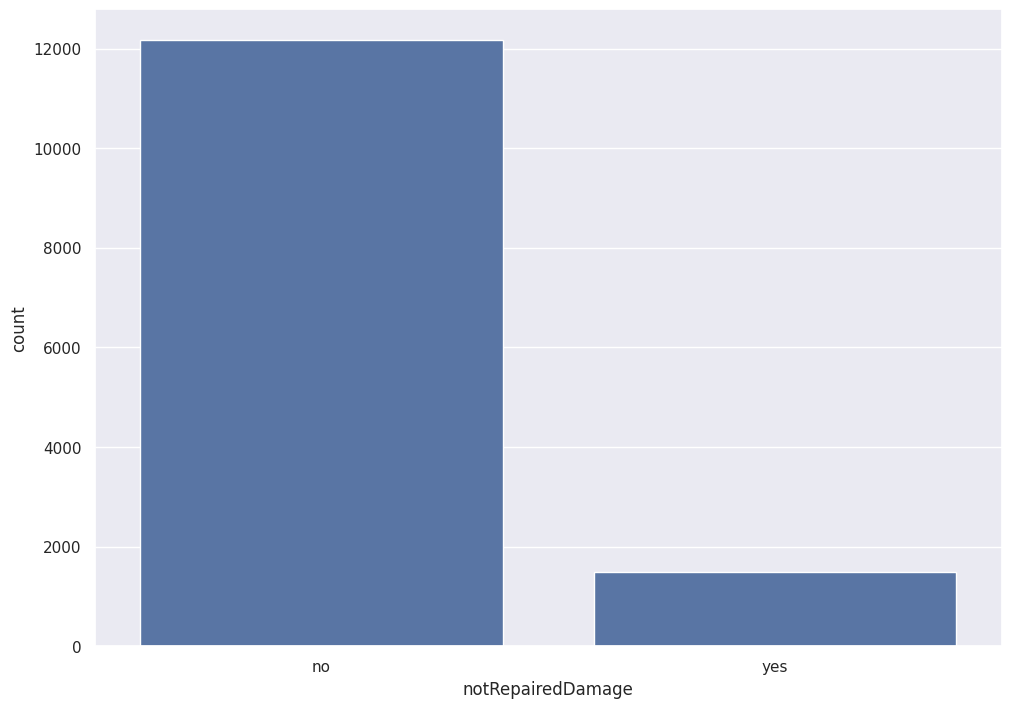

In [ ]:
sns.countplot(x=cars_data1['notRepairedDamage'])

<Axes: xlabel='notRepairedDamage', ylabel='price'>

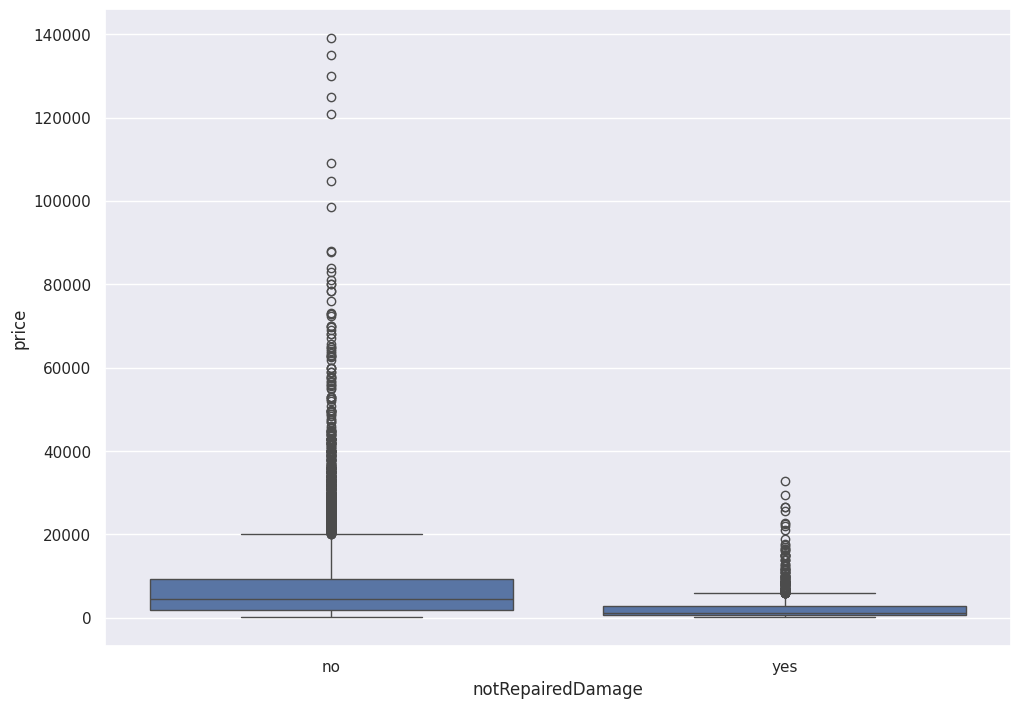

In [ ]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars_data1)

In [ ]:
# the cars that require the damages to be repaired fall under lower price ranges

In [ ]:
# Removing insignificant variables
col = ['seller', 'offerType', 'abtest']
cars_data1 = cars_data1.drop(columns=col,axis=1)

In [ ]:
cars_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16080 entries, 0 to 18702
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              16080 non-null  int64  
 1   vehicleType        14997 non-null  object 
 2   gearbox            15787 non-null  object 
 3   powerPS            16080 non-null  int64  
 4   model              15440 non-null  object 
 5   kilometer          16080 non-null  int64  
 6   fuelType           15071 non-null  object 
 7   brand              16080 non-null  object 
 8   notRepairedDamage  13662 non-null  object 
 9   age                16080 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.3+ MB


In [ ]:
cars_data2 = cars_data1.copy()

In [ ]:
#Correlation

In [ ]:
cars1 = cars_data1.select_dtypes(exclude=[object])
correlation = cars1.corr()
round(correlation,3)

,price,powerPS,kilometer,age
price,1.000,0.578,-0.441,-0.336
powerPS,0.578,1.000,-0.007,-0.149
kilometer,-0.441,-0.007,1.000,0.302
age,-0.336,-0.149,0.302,1.000


In [ ]:
# We are going to build a Linear Regression and Random Forest model on two sets
# 1. Data set obtained by omitting rows with any missing values.
# 2. Data set obtained by imputing the missing values.

## Omitting Missing Values

In [ ]:
cars_omit = cars_data1.dropna(axis=0)

In [ ]:
# Converting categorical variables to dummy variables
cars_omit = pd.get_dummies(cars_omit, drop_first=True)

In [ ]:
cars_omit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12311 entries, 1 to 18698
Columns: 292 entries, price to notRepairedDamage_yes
dtypes: float64(1), int64(3), uint8(288)
memory usage: 3.9 MB


## Importing necessary libraries

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Model building with omitted data

In [ ]:
# separating input and output features
x1 = cars_omit.drop(['price'],axis=1,inplace=False)

In [ ]:
y1 = cars_omit['price']

In [ ]:
# plotting the variable price
prices = pd.DataFrame({'1. Before':y1, '2. After':np.log(y1)})

array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

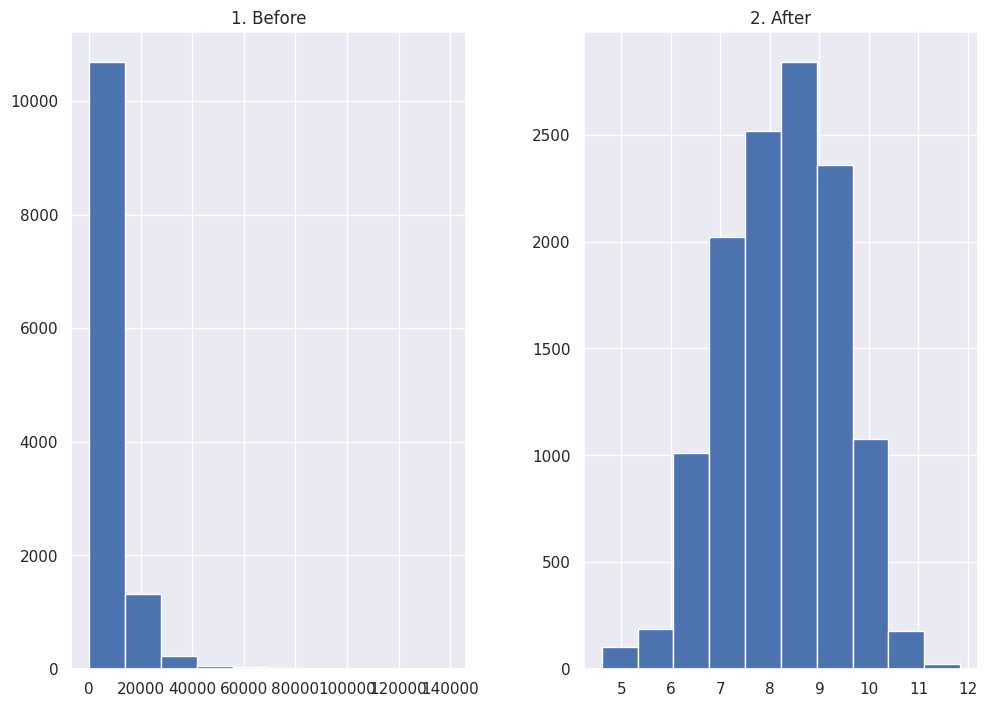

In [ ]:
prices.hist()

In [ ]:
# Transforming price as a logaarithmic value
y1 = np.log(y1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=3)

## Baseline Model for omitted data

In [ ]:
# We are making a base model by using test data mean value.
# This is to set a bechmark and to compare with our regression model.

In [ ]:
# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.25660467538286


In [ ]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [ ]:
# finding the RSME
base_RSME = np.sqrt(mean_squared_error(y_test,base_pred))

In [ ]:
print(base_RSME)

1.1220721306003623


## Linear Regression with omitted data

In [ ]:
# Setting intercept as true
lgr = LinearRegression(fit_intercept=True)

In [ ]:
# model
model_lin1 = lgr.fit(x_train,y_train)

In [ ]:
# predicting model on test set
cars_predictions_lin1 = lgr.predict(x_test)

In [ ]:
# computing RSME
lin_rsme1 = np.sqrt(mean_squared_error(y_test,cars_predictions_lin1))
print(lin_rsme1)

0.5240115768557636


In [ ]:
# R squared value
r2_lin_test1 = model_lin1.score(x_test,y_test)
r2_lin_train1  = model_lin1.score(x_train,y_train)
print(r2_lin_test1)
print(r2_lin_train1)

0.7819077604437557
0.7860574202909166


<Axes: ylabel='price'>

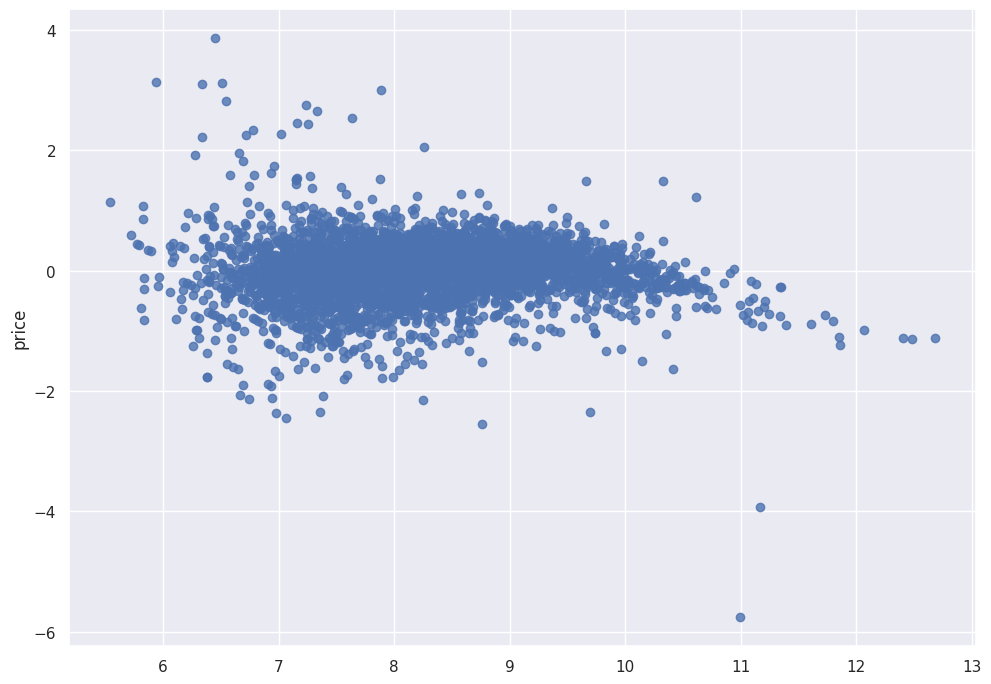

In [ ]:
# Residual diagnostics - Residual plot analysis
residuals1 = y_test - cars_predictions_lin1;
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, fit_reg=False)

In [ ]:
# since most of the data points are concentrated at residuals1=0. Hence, the model is less errorneous

## Random Forest Regression with omitted data

In [ ]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100, max_features = 'auto', max_depth = 100, min_samples_split = 10, min_samples_leaf = 4, random_state = 1)

In [ ]:
# model
model_rf1 = rf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
# predicting model on test set
cars_prediction_rf1 = rf.predict(x_test)

In [ ]:
rf_rsme1 = np.sqrt(mean_squared_error(y_test,cars_prediction_rf1))
print(rf_rsme1)

0.43270796211761947


In [ ]:
# R squared value
r2_rf_test1 = model_rf1.score(x_test,y_test)
r2_rf_train1 = model_rf1.score(x_train,y_train)

In [ ]:
print(r2_rf_test1)
print(r2_rf_train1)

0.8512872441774688
0.9140065658684826


<Axes: ylabel='price'>

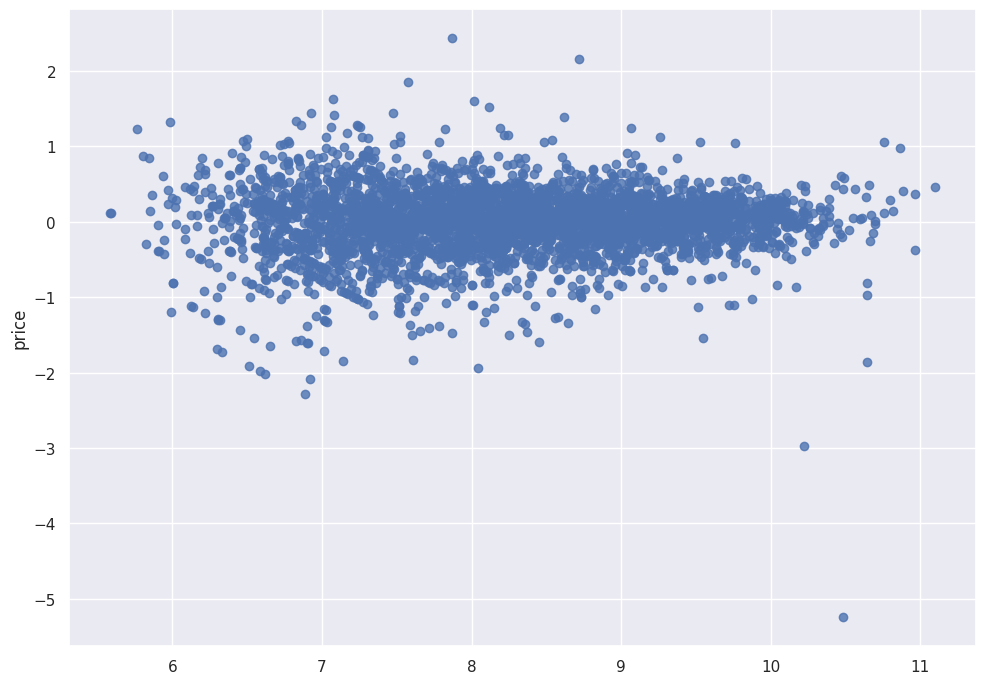

In [ ]:
# Residual diagnostics - Residual plot analysis
residuals2 = y_test - cars_prediction_rf1;
sns.regplot(x=cars_prediction_rf1, y=residuals2, scatter=True, fit_reg=False)

## Imputing Missing values

In [ ]:
cars_imputed = cars_data1.apply(lambda x: x.fillna(x.median())
if x.dtype=='float64' else x.fillna(x.value_counts().index[0]))

In [ ]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
age                  0
dtype: int64

In [ ]:
# Converting categorical variables to dummy variables
cars_imputed = pd.get_dummies(cars_imputed, drop_first=True)

In [ ]:
cars_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16080 entries, 0 to 18702
Columns: 296 entries, price to notRepairedDamage_yes
dtypes: float64(1), int64(3), uint8(292)
memory usage: 5.1 MB


## Model Building using imputed data

In [ ]:
# separating input and output features
x2 = cars_imputed.drop(['price'],axis=1,inplace=False)
y2 = cars_imputed['price']

In [ ]:
# Transforming price as a logrithmic value
y2 = np.log(y2)

In [ ]:
# splitting data into test and train
x_train1, x_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.3,random_state=3)

## Linear Regression with imputed data

In [ ]:
# setting intercept as true
lgr2 = LinearRegression(fit_intercept=True)


In [ ]:
# model
model_lin2 = lgr2.fit(x_train1,y_train1);

In [ ]:
# predicting model on test set
cars_predictions_lin2 = lgr2.predict(x_test1)

In [ ]:
# computing RMSE
lin_rmse2 = np.sqrt(mean_squared_error(y_test1,cars_predictions_lin2))

In [ ]:
print(lin_rmse2)

0.6291977495587169


In [ ]:
# calculating R squared values
residuals = y_test1 - cars_predictions_lin2
r2_lin2_train = model_lin2.score(x_train1,y_train1)
r2_lin2_test = model_lin2.score(x_test1,y_test1)

In [ ]:
print(r2_lin2_train)
print(r2_lin2_test)

0.714857175062563
0.7048607113425369


<Axes: ylabel='price'>

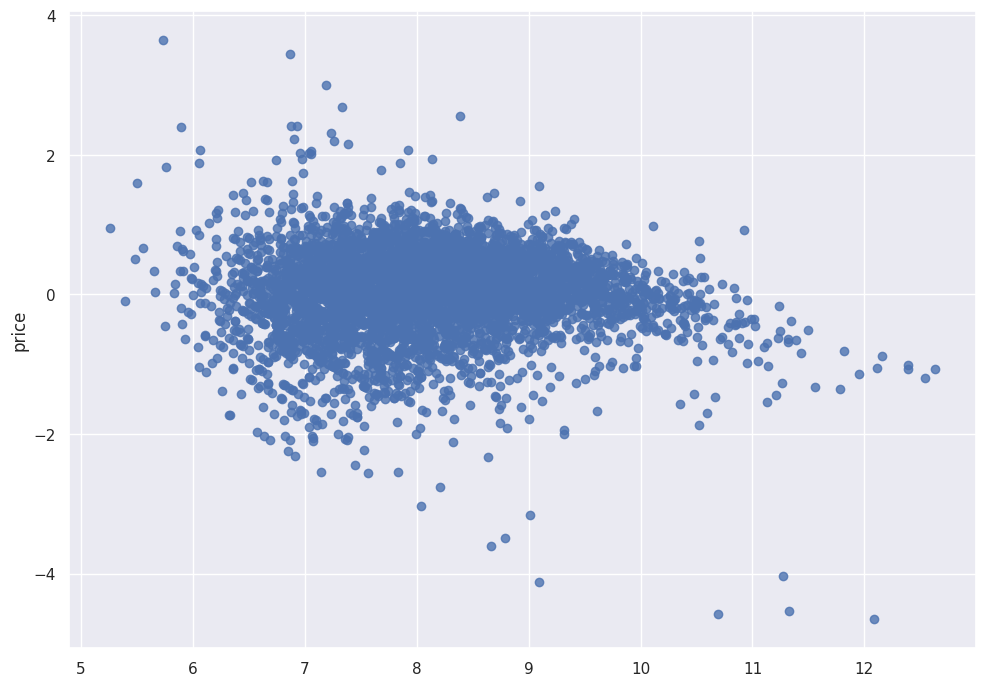

In [ ]:
sns.regplot(x=cars_predictions_lin2, y=residuals, scatter=True, fit_reg=False)